<a href="https://colab.research.google.com/github/C4st3ll4n/google_colab/blob/master/predenem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.externals import joblib

In [ ]:
df_enem = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
df_enem.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,1.0,1.0,1.0,1.0,1.0,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,3.0,1.0,4.0,5.0,NaN,A,A,A,A,A,A,A,A,A


In [ ]:
df_enem.info

<bound method DataFrame.info of       Unnamed: 0                              NU_INSCRICAO  ...  Q049  Q050
0              1  ed50e8aaa58e7a806c337585efee9ca41f1eb1ad  ...     B     D
1              2  2c3acac4b33ec2b195d77e7c04a2d75727fad723  ...     C     A
2              3  f4545f8ccb9ff5c8aad7d32951b3f251a26e6568  ...     B     A
3              4  3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe  ...     A     A
4              5  bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268  ...     A     A
...          ...                                       ...  ...   ...   ...
1201        1202  2693f61a24fcde222935b9b96897d1337fd0ebed  ...     B     A
1202        1203  a33c93099c78963f4fb0072cc8f37bbb7271f4eb  ...     B     A
1203        1204  2366f775b1f590ca2640ae57fad688d0b87aa09f  ...     A     A
1204        1205  3318746d5877e52b705547f4167e7ad7f46965f4  ...     B     D
1205        1206  aadec239371987e73cacd8513e026f3aecd6a6df  ...   NaN   NaN

[1206 rows x 167 columns]>

In [ ]:
df_resposta = pd.DataFrame()

In [ ]:
df_resposta['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [ ]:
df_test = df_test.select_dtypes(include=['int64','float64'])

In [ ]:
var = ['NU_IDADE', 'IN_TREINEIRO', 'NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

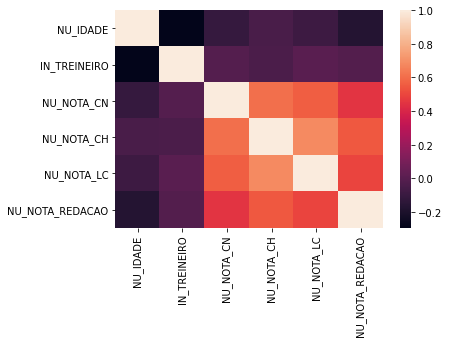

In [ ]:
sns.heatmap(df_test[var].corr())

In [ ]:
features = ['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

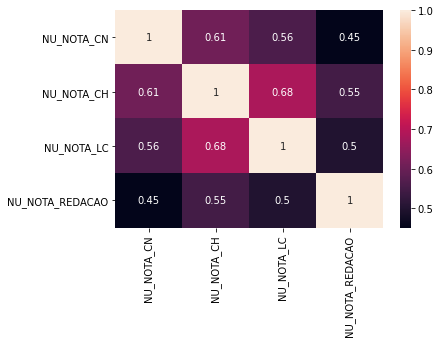

In [ ]:
sns.heatmap(df_test[features].corr(), annot=True)

In [ ]:
df_train = df_enem.copy()
df_train = df_train.loc[
      (df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0) & (df_train['NU_NOTA_CH'].notnull())      & (df_train['NU_NOTA_CH'] != 0) 
    & (df_train['NU_NOTA_LC'].notnull())  & (df_train['NU_NOTA_LC'] != 0) & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)    
]

In [ ]:
df_train[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

In [ ]:
df_test[features].isnull().sum()

NU_NOTA_CN         864
NU_NOTA_CH         864
NU_NOTA_LC         917
NU_NOTA_REDACAO    917
dtype: int64

In [ ]:
df_test['NU_NOTA_CN'].fillna(df_test['NU_NOTA_CN'].mean(), inplace=True)
df_test['NU_NOTA_CH'].fillna(df_test['NU_NOTA_CH'].mean(), inplace=True)
df_test['NU_NOTA_REDACAO'].fillna(df_test['NU_NOTA_REDACAO'].mean(), inplace=True)
df_test['NU_NOTA_LC'].fillna(df_test['NU_NOTA_LC'].mean(), inplace=True)

In [ ]:
df_test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

In [ ]:
Y = df_train['NU_NOTA_MT']

In [ ]:
X = df_train[features]
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [ ]:
print(f"Média:{X_scaled.mean(axis=1)}")
print(f"Desvio Padrão:{X_scaled.std(axis=1)}")

Média:[-7.68715657e-02  4.22804469e-01 -1.95622426e-01 -3.23155923e-02
  1.36921697e+00  4.63411533e-01 -6.52599635e-01 -7.23338230e-03
 -2.28673587e-01 -6.20934397e-01  1.35491479e+00 -1.38267258e-01
 -5.21216407e-01  1.06911230e+00 -5.95979471e-02 -7.91577598e-01
 -5.31456364e-01 -1.79872968e-01  2.58442854e-01  2.27695501e-01
 -3.88682617e-01 -3.98751528e-01 -3.02352056e-01  5.89447711e-01
 -4.41042894e-01 -2.27945758e-01 -9.74839625e-02 -2.43256020e-01
  9.67950246e-01 -5.27205326e-01  1.06032162e+00  6.94081379e-01
  5.45043050e-01  5.31589543e-01  7.29439094e-01 -1.43587311e+00
 -1.35702645e+00 -4.34999179e-01 -6.25117583e-01  8.18094592e-01
  8.90494429e-01 -3.28741365e-01 -8.09313605e-01 -9.28580761e-02
  1.36225690e+00 -7.47819959e-01 -4.41364581e-01  2.03057501e-01
  8.74487731e-02 -5.03647489e-01 -1.65601768e-01 -7.01584836e-01
 -2.45352748e-01 -6.81882633e-01 -7.46032336e-02 -3.50994941e-01
  3.72432832e-01 -5.54053612e-01 -9.34314967e-01 -1.26932866e-01
 -1.52211059e-01 -6

In [ ]:
X_test = df_test[features]

In [ ]:
pipeline = make_pipeline(StandardScaler(),
                         RandomForestRegressor())
hyper_params = {
    'randomforestregressor__max_features':['auto','sqrt','log2'],
                    'randomforestregressor__max_depth':[None, 5, 3, 1]
}

In [ ]:
clf = GridSearchCV(pipeline, hyper_params)
clf.fit(X_scaled, Y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                          

In [ ]:
pred_nota = clf.predict(X_test)

In [ ]:
df_resposta['NU_NOTA_MT'] = pred_nota

In [ ]:
df_resposta.to_csv("answer.csv",index=False)